# §6. Multivariate Regression

We explored simple regression in §3 and we saw the power of linearly fitting a model to a single independent variable. However, most problems require solutions which have studied several independent variables in order to harness any predictive power. In this section, the theory and practice of multivariate regression in explored.

## <a name="TOC"></a> Table of Contents:
---
1. [Multivariate Regression Theory](#Theory)
2. [Performing Multivariate Regression](#Practice)
3. [Alternative Approaches](#AltPractice)


## <a name="Theory"></a> [Simple Regression Theory](#TOC)
---

<img name="Frontier" src="Figures\Multivariate.Regression.JPG" alt="Drawing" style="width: 340px;" align = "right"/>
<img name="Frontier" src="Figures\Univariate.Regression.JPG" alt="Drawing" style="width: 255px;" align = "right"/>

When studying multiple variables, the dimensionality of the solution increases with the number of explanatory variables which are being considered. In the univariate example shown on the left, we were solving for a linear relationship. In the two dimensional case shown on the left, the relationship between weight and horsepower to MPG results in a solution taking the form of a surface. In higher order problems, the dimensionality of the solution will increase 

line $\longrightarrow$ plane/surface $\longrightarrow$ volume $\longrightarrow$ hyper-volume $\longrightarrow$ etc.

Once we understand the simple regression, the mathematics behind the multivariate regression are a simple extension from the original:

$$
\text{Univariate: } Y_i = \beta_0 + \beta_1 X_i + \epsilon_i \\
\text{Multivariate: } Y_i = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... \beta_i X_i \epsilon_i
$$

Just as we saw in the univariate regression, we can use the R-squared metric to understand how well the model has studied our data. However, some variables in our study will be of more influence than others. In order to generate the best predictive power, we must find the variables which have the most impact on improving the models R-squared value. There are many methods of determining these variables of interest but the most common methods include backward elimination and forward selection.

Under backward elimination, the model begins with all variables included in the analysis and then eliminates the least influential of the lot. Under forward selection, the model begins without any variables included and then navigates the permutations of variable inclusion to find the best combination possible.

Alternatively, we could use the p-values of the beta coefficients. In statistics, p-value is the probability that a more extreme result would be found other than the event being considered. In other words, it indicates whether the beta coefficients of the model should have been different than the coefficients that were found. The lower the p-value, the higher the confidence we should have in our coefficients. A p-value that is lower than 5% allows us to state that *we can be 95% confident that the beta coeffieicnt we've estimated is different than 0*.


## <a name="Practice"></a> [Performing Multivariate Regression](#TOC)
---

First I will document the approach that the Udemy course offers for us and then I will demonstrate alternative approaches to optimize multivariate regression models.


In [2]:
# ---------------- IMPORT LIBRARIES ---------------- #

# Standard mathematics
import numpy as np
import pandas as pd

# Access data from directory
from pathlib import Path

# Plotting and 3D axes tools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Statistical models
from scipy import stats
import statsmodels.api as sm

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# ---------------- LOAD DATA ---------------- #

# Define subdirectory
root = Path('Data')

# Import the data from subdirectory
Data = pd.read_csv(root / 'Housing.Data.csv')

# Look at first 5 instances of the data
Data.head(4)


,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000


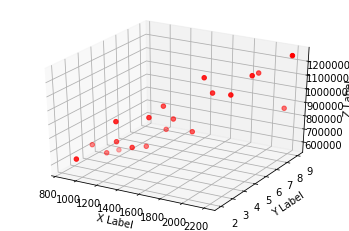

In [7]:
# ---------------- PREPROCESSING ---------------- #

# Split data into variables
X = Data[['House Size (sq.ft.)', 'Number of Rooms', 'Year of Construction']]
Y = Data['House Price']


# ---------------- VISUALIZE DATA ---------------- #

"""
 We cannot plot more than two indep variables against the dep variable at one time
     but we can plot the two as a time without issue.
"""

# Instantiate plot objs
fig = plt.figure()
ax  = fig.add_subplot(111, projection = '3d')

# Create scatter
ax.scatter(X['House Size (sq.ft.)'], X['Number of Rooms'], Y, c = 'r', marker = 'o')

# Label axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Illustrate
plt.show()


In [8]:
# ---------------- PERFORM REGRESSION ---------------- #

# Assign independent variable
X1 = sm.add_constant(X)

# Run regression
reg = sm.OLS(Y, X1).fit()

# Analyze results
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     14.90
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           6.82e-05
Time:                        01:23:45   Log-Likelihood:                -258.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      16   BIC:                             528.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.452e+06    5.4e+06     -1.752      0.099   -2.09e+07    1.99e+06
House Size (sq.ft.)    341.8271    179.666      1.903      0.075     -39.049     722.703
Number of Rooms        1.16e+04   3.74e+04      0.310      0.760   -6.77e+04    9.08e+04
Year of Construction  4863.5761   2697.969      1.803      0.090    -855.862    1.06e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.747
Skew:                          -0.676   Prob(JB):                        0.418
Kurtosis:                       2.484   Cond. No.                     5.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see that the commands used for univariate and multivariate regression as one and the same, as the model is capable of training for both variables contexts. However, I do not like the fact that it does not allow us to change the strategy of the optimization.

Nevertheless, the model performed well with an R-squared of 73.6%. We can derive the equation of our volume from the coefficients in the second table but we notice that the p-values for some of the coefficients indicate that some variables are more influential than others. Clearly the model chose not to optimize them out of consideration. In order to optimize the model, the Udemy course suggests that we manually drop and add variables, which is tedious and insulting that they don't inform us of the forward selection and backward elimination solutions.

## <a name="AltPractice"></a> [Alternative Approaches](#TOC)
---

Below I will explain, from my own research, how we can optimize our regression models automatically using more advanced Python libraries.


In [9]:
# ---------------- IMPORT LIBRARIES ---------------- #

# Standard mathematics
import numpy as np
import pandas as pd

# Access data from directory
from pathlib import Path

# Plotting and 3D axes tools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Statistical models
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# ---------------- LOAD DATA ---------------- #

# Define subdirectory
root = Path('Data')

# Import the data from subdirectory
Data = pd.read_csv(root / 'Housing.Data.csv')

# Look at first 5 instances of the data
Data.head(4)


,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000


In [ ]:
# ---------------- PREPROCESSING ---------------- #

# Split data into variables
X = Data[['House Size (sq.ft.)', 'Number of Rooms', 'Year of Construction']].values
Y = Data['House Price'].values

# ---------------- PERFORM REGRESSION WITH B.E ---------------- #

"""
 Create array for optimal matrix which will include only the variables with 
 the highest significance values with respect to profit. Recall the process
 of backwards elimination:
     Determine the max significance level (SL) to stay in the model
     Include all variables
     Loop:
         Fit model with current variables
         Consider the variable with the highest p-value
         If p > SL:
             Remove variable
             Return to beginning of loop
        Else:
            Exit loop     
"""

sl = 0.05;                                              # Set maximum p-value
x_opt = x[:, [0, 1, 2, 3, 4, 5]];                       # Initialize x_opt with all variables
regressor_OLS = sm.OLS(endog = y, exog = x_opt).fit();  # Fit ordinary least squares (endog = dependent, exog = independent)

pVal = regressor_OLS.pvalues;                                   # Capture p-values for variables
while np.argmax(pVal) > sl:                                     # While the highest p-value is unacceptable
    remove = np.argmax(regressor_OLS.pvalues);                  # Mark the variable with the highest p-value
    keep = list(range(len(x_opt[0])));                          # Save the indexes of the lower p-value variables
    print("pval of dim removed: " + str(np.argmax(pVal)));      # Shout the p-value that's eliminated
    keep.pop(remove);                                           # Remove variable from save with highest p-value
    x_opt = x_opt[:, keep];                                     # Update x_opt with lower p-value variables
    regressor_OLS = sm.OLS(endog = y, exog = x_opt).fit();      # Refit model without high p-value
    pVal = regressor_OLS.pvalues;                               # Recapture p-values
    print(str(len(pVal)-1) + " dimensions remaining...");       # Shout how many variables remain
    print(pVal);                                                # Shout new p-values

regressor_OLS.summary() # Print final regression summary
regressor = LinearRegression();                         # Create instance of regressor class
regressor.fit(x_train, y_train);                        # Fit regressor to training set

In [19]:
# Split data into variables
X = Data[['House Size (sq.ft.)', 'Number of Rooms', 'Year of Construction']].values
Y = Data['House Price'].values

